# Experiment parameters

In [8]:
window_size = 288
train_prop = 0.8

# Load historical price data

In [1]:
import pandas as pd
import numpy as np

In [2]:
BTC_data = pd.read_csv('binance_datasets/BTC_data.csv')
ETH_data = pd.read_csv('binance_datasets/ETH_data.csv')

In [3]:
BTC_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,7195.24,7196.25,7178.64,7179.78,95.509133,1577837099999,686317.136252,1127,32.773245,235537.295045,0
1,2020-01-01 00:05:00,7179.76,7191.77,7178.20,7191.07,59.365225,1577837399999,426481.260364,631,24.766513,177935.618201,0
2,2020-01-01 00:10:00,7193.15,7193.53,7180.24,7180.97,48.068510,1577837699999,345446.503019,694,19.422283,139596.621683,0
3,2020-01-01 00:15:00,7180.97,7186.40,7177.35,7178.29,32.192929,1577837999999,231162.555424,576,12.963258,93091.433276,0
4,2020-01-01 00:20:00,7177.71,7182.46,7175.47,7176.96,49.027397,1577838299999,351927.893881,710,22.819744,163817.881155,0


In [4]:
ETH_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,129.16,129.19,128.80,128.88,696.71412,1577837099999,89878.706140,278,374.55660,48313.962330,0
1,2020-01-01 00:05:00,128.84,128.95,128.69,128.93,724.37040,1577837399999,93302.364520,298,277.02182,35691.253799,0
2,2020-01-01 00:10:00,128.93,128.98,128.80,128.91,462.49462,1577837699999,59607.158976,203,223.12403,28749.907229,0
3,2020-01-01 00:15:00,128.91,129.05,128.84,128.85,360.50849,1577837999999,46478.320289,224,223.46932,28810.088623,0
4,2020-01-01 00:20:00,128.85,128.91,128.69,128.72,1827.53848,1577838299999,235286.623182,244,917.60510,118124.990547,0


In [5]:
# Limit dataset to specific time frame
start_time = "	2020-01-01 00:00:00"
end_time = "2021-01-01 00:00:00"

if start_time is not None and end_time is not None:
    BTC_data = BTC_data[(BTC_data['timestamp'] >= start_time) & (BTC_data['timestamp'] <= end_time)]
    ETH_data = ETH_data[(ETH_data['timestamp'] >= start_time) & (ETH_data['timestamp'] <= end_time)]

In [6]:
print(f"Length of BTC data: {len(BTC_data)}")
print(f"Length of ETH data: {len(ETH_data)}")

Length of BTC data: 105261
Length of ETH data: 105261


In [7]:
# Get the closing prices
BTC_close = BTC_data['close']
ETH_close = ETH_data['close']

# Create closing prices matrix
closing_prices = np.column_stack((BTC_close, ETH_close))
print(closing_prices.shape)

(105261, 2)


In [9]:
# Split the data into training and testing sets
train_size = int(train_prop * closing_prices.shape[0])
train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:]

# Split original dataframes
BTC_train = BTC_data[:train_size]
BTC_test = BTC_data[train_size:]
ETH_train = ETH_data[:train_size]
ETH_test = ETH_data[train_size:]

print(f"Length of training data: {len(train_data)}")
print(f"Length of testing data: {len(test_data)}")

Length of training data: 84208
Length of testing data: 21053


# Save to json

In [10]:
from train_data_generation import create_train_json

# Create json sequences files for training and testing data
create_train_json(BTC_train, "binance_datasets/BTC_1_year_train.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_train, "binance_datasets/ETH_1_year_train.json", window_size=window_size, max_samples=np.inf)

create_train_json(BTC_test, "binance_datasets/BTC_1_year_test.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_test, "binance_datasets/ETH_1_year_test.json", window_size=window_size, max_samples=np.inf)

/users/eleves-b/2022/wajdi.maatouk/EA_DL_project/train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])
Processing: 100%|██████████| 83920/83920 [00:01<00:00, 53938.22 samples/s]


Saved 83836 samples to binance_datasets/BTC_1_year_train.json


Processing: 100%|██████████| 83920/83920 [00:01<00:00, 66363.97 samples/s]


Saved 83836 samples to binance_datasets/ETH_1_year_train.json


Processing: 100%|██████████| 20765/20765 [00:00<00:00, 65809.89 samples/s]


Saved 20744 samples to binance_datasets/BTC_1_year_test.json


Processing: 100%|██████████| 20765/20765 [00:00<00:00, 78413.20 samples/s]


Saved 20744 samples to binance_datasets/ETH_1_year_test.json


# Train linear prediction model

In [12]:
import train_linear_model

args = train_linear_model.Args(
    model_path = "models/btc_1_year_linear_model.pth",
    train_path = "binance_datasets/BTC_1_year_train.json",
    test_path = "binance_datasets/BTC_1_year_test.json",
    epochs = 200,
    lr = 2*1e-5
)

[Epoch 1/200] Train MSE: 5937457.9038 | Val MSE: 200753.5010
[Epoch 2/200] Train MSE: 35848.6065 | Val MSE: 196413.5970
[Epoch 3/200] Train MSE: 35763.6306 | Val MSE: 196186.1247
[Epoch 4/200] Train MSE: 35693.8855 | Val MSE: 195447.8331
[Epoch 5/200] Train MSE: 35651.3677 | Val MSE: 196450.1166
[Epoch 6/200] Train MSE: 35513.6570 | Val MSE: 195123.9957
[Epoch 7/200] Train MSE: 35394.2805 | Val MSE: 195724.6472
[Epoch 8/200] Train MSE: 35256.0611 | Val MSE: 190891.4449
[Epoch 9/200] Train MSE: 35089.0839 | Val MSE: 192264.8739
[Epoch 10/200] Train MSE: 34900.1783 | Val MSE: 189774.5863
[Epoch 11/200] Train MSE: 34632.4690 | Val MSE: 190914.9790
[Epoch 12/200] Train MSE: 34354.9584 | Val MSE: 187223.4021
[Epoch 13/200] Train MSE: 34011.1835 | Val MSE: 184484.7943
[Epoch 14/200] Train MSE: 33627.3648 | Val MSE: 181235.7993
[Epoch 15/200] Train MSE: 33193.0874 | Val MSE: 181399.2612
[Epoch 16/200] Train MSE: 32720.7202 | Val MSE: 173714.3438
[Epoch 17/200] Train MSE: 32127.1150 | Val MSE:

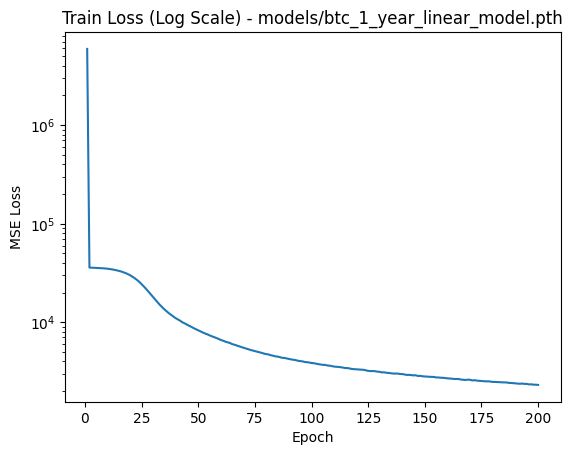

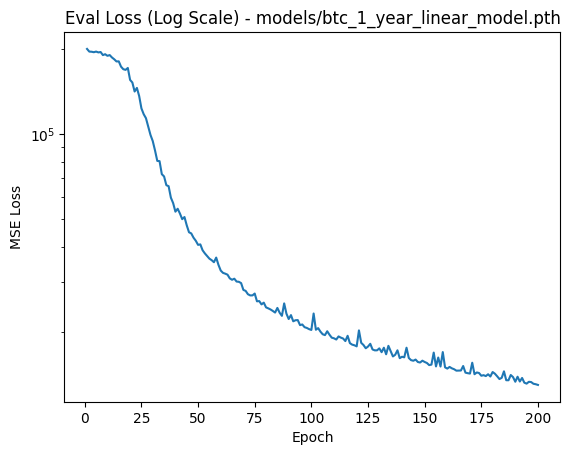

In [13]:
btc_linear_model = train_linear_model.main(args)

In [14]:
args = train_linear_model.Args(
    model_path = "models/eth_1_year_linear_model.pth",
    train_path = "binance_datasets/ETH_1_year_train.json",
    test_path = "binance_datasets/ETH_1_year_test.json",
    epochs = 200,
    lr = 2*1e-5
)

[Epoch 1/200] Train MSE: 36586.2362 | Val MSE: 7384.4566
[Epoch 2/200] Train MSE: 313.6434 | Val MSE: 204.1465
[Epoch 3/200] Train MSE: 51.7616 | Val MSE: 195.2400
[Epoch 4/200] Train MSE: 51.6361 | Val MSE: 194.7173
[Epoch 5/200] Train MSE: 51.5219 | Val MSE: 194.8521
[Epoch 6/200] Train MSE: 51.4153 | Val MSE: 193.7896
[Epoch 7/200] Train MSE: 51.2960 | Val MSE: 194.0183
[Epoch 8/200] Train MSE: 51.1575 | Val MSE: 192.4136
[Epoch 9/200] Train MSE: 50.9882 | Val MSE: 191.6030
[Epoch 10/200] Train MSE: 50.7718 | Val MSE: 190.9998
[Epoch 11/200] Train MSE: 50.4989 | Val MSE: 191.7145
[Epoch 12/200] Train MSE: 50.2090 | Val MSE: 189.1230
[Epoch 13/200] Train MSE: 49.8566 | Val MSE: 188.1608
[Epoch 14/200] Train MSE: 49.4091 | Val MSE: 188.1648
[Epoch 15/200] Train MSE: 48.9060 | Val MSE: 184.4989
[Epoch 16/200] Train MSE: 48.3586 | Val MSE: 181.5734
[Epoch 17/200] Train MSE: 47.7451 | Val MSE: 181.3569
[Epoch 18/200] Train MSE: 46.9643 | Val MSE: 177.8975
[Epoch 19/200] Train MSE: 46.126

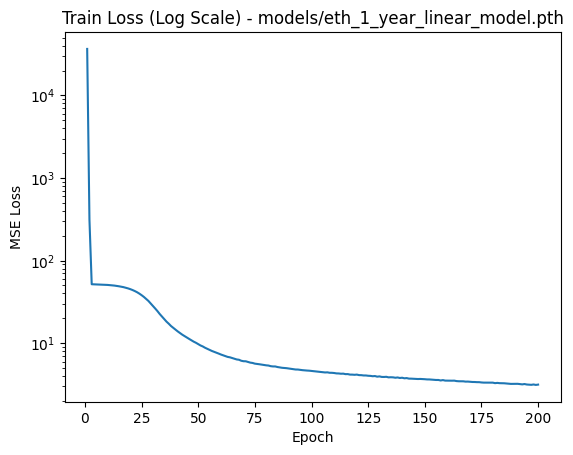

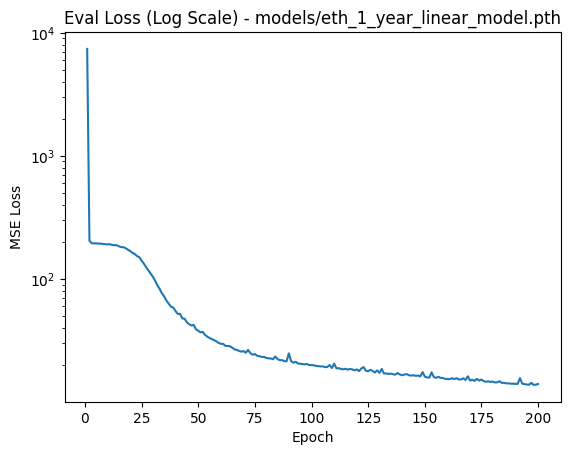

In [15]:
eth_linear_model = train_linear_model.main(args)

# Run training experiment

In [16]:
import ppo
import torch
import torch.nn as nn

# Re-instantiate the model first
btc_linear_model = model = nn.Linear(in_features=window_size, out_features=1)
btc_linear_model.load_state_dict(torch.load("models/btc_1_year_linear_model.pth"))
btc_linear_model.to("cuda")  # Move model to GPU if needed

eth_linear_model = nn.Linear(in_features=window_size, out_features=1)  # Adjust input_dim
eth_linear_model.load_state_dict(torch.load("models/eth_1_year_linear_model.pth"))
eth_linear_model.to("cuda")

prediction_models = [btc_linear_model, eth_linear_model]

# Experiment arguments
args = ppo.Args(
    exp_name="experiment_1_year",         # name of this experiment
    seed=1,                          # random seed
    torch_deterministic=True,        # if True, sets torch.backends.cudnn.deterministic = False
    cuda=True,                       # if True, CUDA will be enabled by default
    track=False,                     # if True, track experiment with Weights & Biases

    # Environment specific arguments
    n_assets=2,                      # number of assets in the portfolio
    window_size=window_size,         # size of the historical‐price window (observation dimension)
    action_step_size=0.1,            # step size for actions
    episode_length=288,              # length of each episode
    reward_method="portfolio_value", # reward method: "portfolio_value" or "sharpe_ratio"
    g1=0.5,                          # weight for Sharpe ratio in combined reward
    g2=0.5,                          # weight for portfolio return in combined reward
    closing_prices=train_data,                    # array of historical closing prices for all assets
    prediction_method="regression",               # prediction method: "regression" or "directional"
    prediction_models=prediction_models,          # optional external model for price predictions

    # Algorithm specific arguments
    env_id="PortfolioEnv-v0",        # gym environment ID
    total_timesteps=500000,          # total timesteps for training
    learning_rate=1e-4,            # learning rate for the optimizer
    num_envs=8,                      # number of parallel environments
    num_steps=72,                    # steps per environment rollout before update
    anneal_lr=True,                  # if True, linearly anneals learning rate
    gamma=0.98,                      # discount factor for rewards
    gae_lambda=0.95,                 # lambda parameter for GAE (advantage estimation)
    num_minibatches=4,               # number of minibatches per update epoch
    update_epochs=4,                 # number of update epochs (K epochs in PPO)
    norm_adv=True,                   # if True, normalize advantages
    clip_coef=0.2,                   # clipping coefficient for PPO surrogate objective
    clip_vloss=True,                 # if True, clip value function updates
    ent_coef=0.01,                   # entropy bonus coefficient
    vf_coef=0.5,                     # value loss coefficient
    max_grad_norm=0.5,               # max gradient norm (gradient clipping)
    target_kl=None,                  # KL divergence threshold for early stopping

    # Computed at runtime
    batch_size=0,                    # batch size (computed internally from num_envs & num_steps)
    minibatch_size=0,                # minibatch size (computed internally)
    num_iterations=0                 # number of iterations (computed internally)
)


 PortfolioEnv-v0 successfully registered!


In [17]:
ppo.main(args)

/Data/MAP371_TP3/rl_env/lib64/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (288, 2)
  logger.warn(
/Data/MAP371_TP3/rl_env/lib64/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float64, actual type: int64
  logger.warn(
/Data/MAP371_TP3/rl_env/lib64/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:160: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/Data/MAP371_TP3/rl_env/lib64/python3.9/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casti

🔍 Observation space: Box([  0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -

/Data/MAP371_TP3/rl_env/lib64/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:160: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(


SPS: 1114
SPS: 1410
SPS: 1553
global_step=2304, episodic_return=[287.00403]
global_step=2304, episodic_return=[289.25046]
global_step=2304, episodic_return=[282.71317]
global_step=2304, episodic_return=[292.50153]
global_step=2304, episodic_return=[287.34808]
global_step=2304, episodic_return=[284.85687]
global_step=2304, episodic_return=[287.71896]
global_step=2304, episodic_return=[286.4505]
SPS: 1631
SPS: 1689
SPS: 1728
SPS: 1762
global_step=4608, episodic_return=[289.77295]
global_step=4608, episodic_return=[288.77243]
global_step=4608, episodic_return=[289.47867]
global_step=4608, episodic_return=[285.27628]
global_step=4608, episodic_return=[312.0689]
global_step=4608, episodic_return=[287.19656]
global_step=4608, episodic_return=[281.0647]
global_step=4608, episodic_return=[291.65466]
SPS: 1779
SPS: 1794
SPS: 1807
SPS: 1821
global_step=6912, episodic_return=[288.79132]
global_step=6912, episodic_return=[286.78162]
global_step=6912, episodic_return=[290.2534]
global_step=6912, ep

# Evaluate model

In [18]:
import torch
import numpy as np
import pandas as pd
import gymnasium as gym
import ppo  # Import PPO script
from portfolio_env import make_wrapped_env
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load the trained model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.num_envs = 1 # Single environment for evaluation

envs = gym.vector.SyncVectorEnv(
        [ppo.make_env(args.env_id, args) for _ in range(1)]
    )


In [ ]:

# Load trained PPO agent
agent = ppo.Agent(envs).to(device)
agent.load_state_dict(torch.load(f"models/ppo_agent_{args.exp_name}.pt"))
agent.eval()  # Set to evaluation mode


🔍 Observation space: Box([  0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -

Agent(
  (critic): Sequential(
    (0): Linear(in_features=581, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
  (actor): Sequential(
    (0): Linear(in_features=581, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=66, bias=True)
  )
)

In [20]:

# -----------------------------
# 2️⃣ Load the test dataset
# -----------------------------

# Ensure dataset has enough data
assert test_data.shape[0] > envs.get_attr("episode_length")[0], "Test data is too short for evaluation!"


In [ ]:
# -----------------------------
# 3️⃣ Run Evaluation Episodes
# -----------------------------

# Number of evaluation runs
num_eval_episodes = 20  

# Store results
results = []

for episode in range(num_eval_episodes):
    # Randomly select a time window
    start_time = np.random.randint(window_size, test_data.shape[0] - args.episode_length)
    test_window = test_data[start_time : start_time + args.episode_length]

    # Set closing prices for evaluation
    args.closing_prices = test_window

    # Reset the environment and get initial observation
    next_obs, _ = envs.reset()
    next_obs = torch.tensor(next_obs, dtype=torch.float32, device=device)  # Convert to Tensor

    next_done = torch.zeros(args.num_envs).to(device)
    done = False
    total_reward = 0
    returns = []  # Track portfolio value over time
    portfolio_weights = []  # Track portfolio weights over time
    model_predictions = []  # Track model predictions over time
    real_prices = []  # Track real prices over time

    while not done:
        with torch.no_grad():
            action, _, _, _ = agent.get_action_and_value(next_obs)

        next_obs, reward, terminations, truncations, infos = envs.step(action.cpu().numpy())
        next_done = np.logical_or(terminations, truncations)

        total_reward += reward[0]  # Track reward
        next_obs = torch.tensor(next_obs, dtype=torch.float32, device=device)  # Ensure tensor format
        returns.append(envs.get_attr("historical_returns")[0][-1])  # Track portfolio value
        portfolio_weights.append(envs.get_attr("portfolio")[0])

        done = next_done[0]  # Check if the episode is done

    # Calculate final portfolio value & Sharpe ratio
    final_portfolio_value = returns[-2]
    mean_return = np.mean(returns)
    std_return = np.std(returns) + 1e-8  # Avoid division by zero
    sharpe_ratio = mean_return / std_return


    # Store results
    results.append({
        "returns": returns,
        "portfolio_weights": portfolio_weights,
        "episode": episode,
        "start_time": start_time,
        "final_value": final_portfolio_value,
        "sharpe_ratio": sharpe_ratio,
        "total_reward": total_reward
    })

    print(f"Episode {episode + 1}/{num_eval_episodes}: Final Value = {final_portfolio_value:.4f}, Sharpe Ratio = {sharpe_ratio:.4f}")

Episode 1/20: Final Value = 1.0321, Sharpe Ratio = 120.8971
Episode 2/20: Final Value = 1.0075, Sharpe Ratio = 406.8452
Episode 3/20: Final Value = 0.9793, Sharpe Ratio = 111.7256
Episode 4/20: Final Value = 1.0221, Sharpe Ratio = 88.2340
Episode 5/20: Final Value = 1.0110, Sharpe Ratio = 100.9559
Episode 6/20: Final Value = 0.9829, Sharpe Ratio = 294.3371
Episode 7/20: Final Value = 1.0348, Sharpe Ratio = 101.2270
Episode 8/20: Final Value = 1.0455, Sharpe Ratio = 43.3335
Episode 9/20: Final Value = 1.0229, Sharpe Ratio = 147.8938
Episode 10/20: Final Value = 1.0230, Sharpe Ratio = 121.8687
Episode 11/20: Final Value = 1.0083, Sharpe Ratio = 327.6740
Episode 12/20: Final Value = 1.0071, Sharpe Ratio = 197.1525
Episode 13/20: Final Value = 0.9476, Sharpe Ratio = 53.7978
Episode 14/20: Final Value = 0.9952, Sharpe Ratio = 207.0190
Episode 15/20: Final Value = 0.9861, Sharpe Ratio = 117.4602
Episode 16/20: Final Value = 0.9989, Sharpe Ratio = 293.2576
Episode 17/20: Final Value = 1.0118,

                                    portfolio_weights  episode  start_time  \
0   [[0.2, 0.8, 0.0], [0.6000000000000001, 0.2, 0....        0        2304   
1   [[0.0, 0.6000000000000001, 0.4], [0.5, 0.0, 0....        1        3456   
2   [[0.6000000000000001, 0.30000000000000004, 0.1...        2        7243   
3   [[0.4, 0.4, 0.2], [0.0, 0.7000000000000001, 0....        3       15059   
4   [[0.8, 0.2, 0.0], [0.0, 1.0, 0.0], [0.0, 0.700...        4        8610   
5   [[0.6000000000000001, 0.1, 0.30000000000000004...        5       20674   
6   [[0.6000000000000001, 0.2, 0.2], [0.2, 0.0, 0....        6        6834   
7   [[0.5, 0.1, 0.4], [0.6000000000000001, 0.0, 0....        7       17323   
8   [[0.0, 1.0, 0.0], [0.1, 0.8, 0.1], [0.60000000...        8         671   
9   [[0.6000000000000001, 0.0, 0.4], [0.2, 0.30000...        9       16851   
10  [[0.4, 0.4, 0.2], [0.6000000000000001, 0.1, 0....       10       16010   
11  [[0.0, 0.4, 0.6000000000000001], [0.2, 0.2, 0....       11  

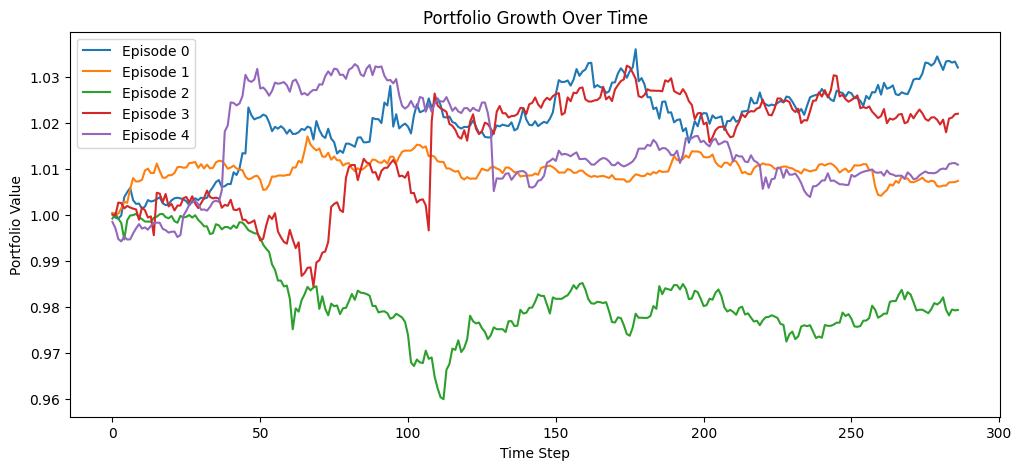

In [23]:
# -----------------------------
# 4️⃣ Display and Plot Results
# -----------------------------
df_results = pd.DataFrame(results).drop(columns=['returns'])
print(df_results)

# Plot portfolio values over time for a few episodes
plt.figure(figsize=(12, 5))
for i in range(min(5, num_eval_episodes)):  # Plot first 5 episodes
    returns = results[i]["returns"][:-1]
    plt.plot(range(len(returns)), returns, label=f"Episode {i}")

plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Growth Over Time")
plt.legend()
plt.show()

envs.close()

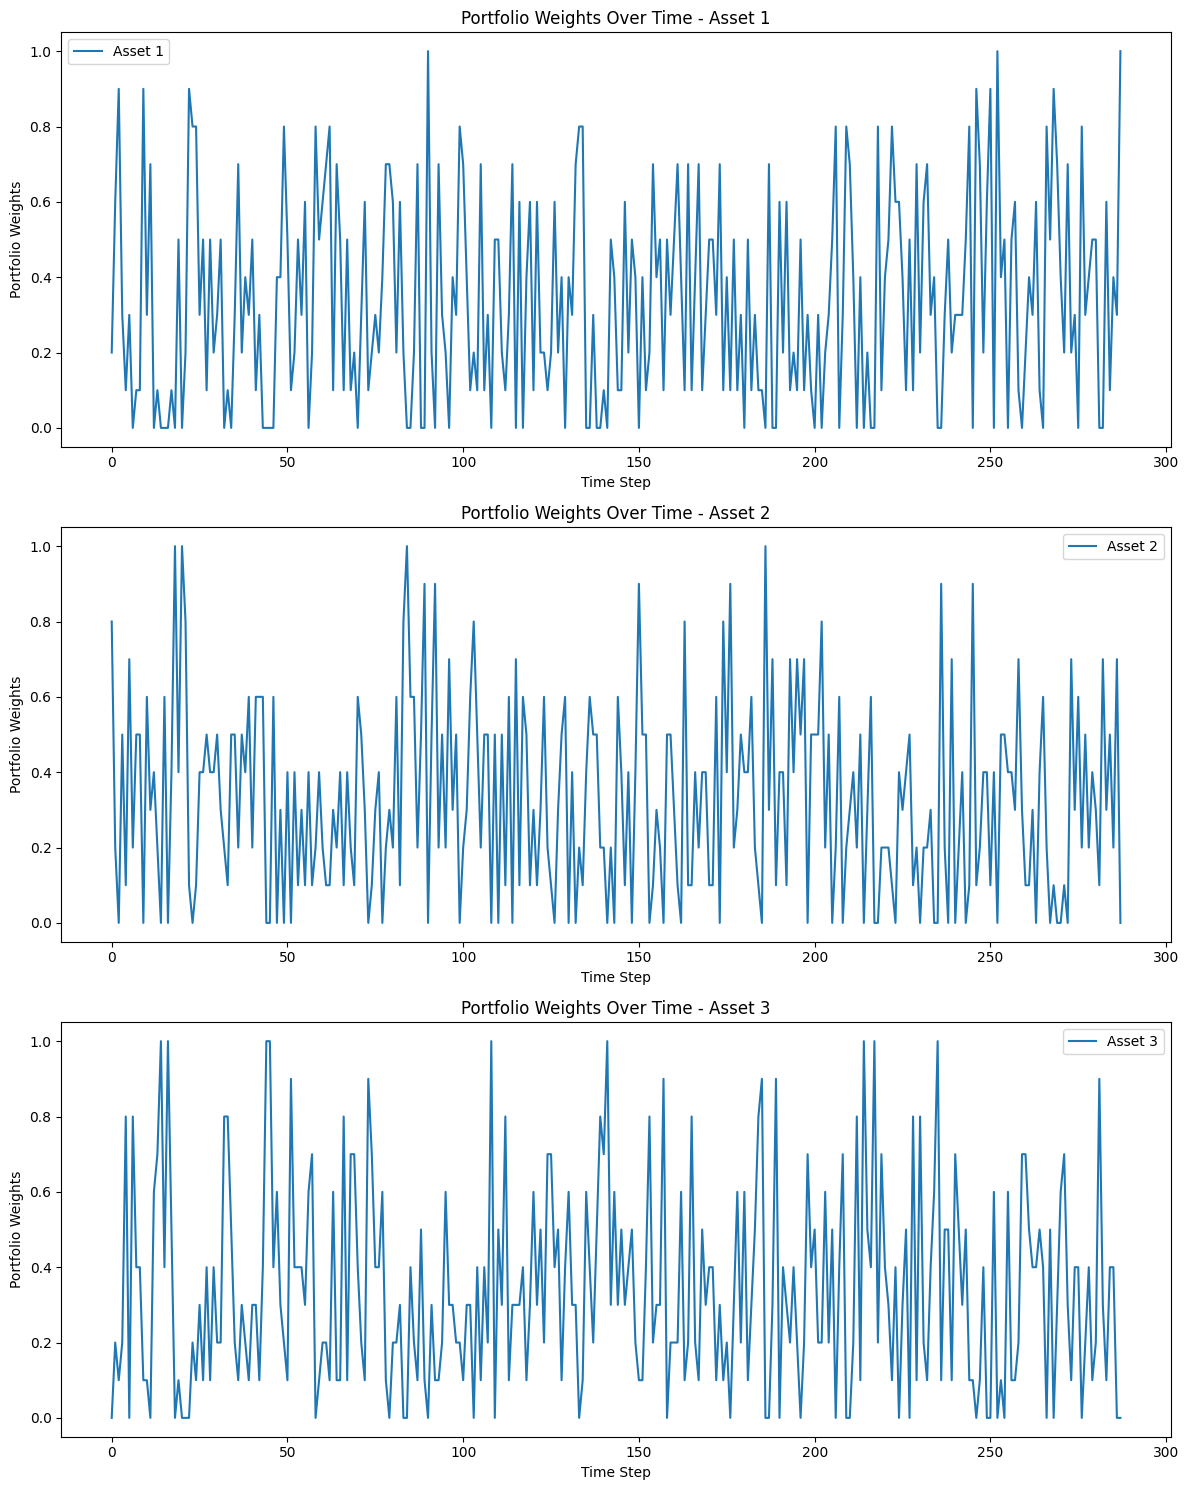

In [24]:
# Plot portfolio weights over time for a single episode, separate plot for each asset
episode_index = 0  # Change this to the desired episode index

portfolio_weights = results[episode_index]["portfolio_weights"]
portfolio_weights = np.array(portfolio_weights)

num_assets = portfolio_weights.shape[1]

plt.figure(figsize=(12, 5 * num_assets))
for j in range(num_assets):
    plt.subplot(num_assets, 1, j + 1)
    plt.plot(range(len(portfolio_weights)), portfolio_weights[:, j], label=f"Asset {j+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Portfolio Weights")
    plt.title(f"Portfolio Weights Over Time - Asset {j+1}")
    plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Number of actions in action space
envs.single_action_space

Discrete(66)